In [1]:
import pandas as pd
import plotly

In [11]:
df = pd.read_excel('data-original-20230820.xlsx',sheet_name='Processed')
df['省别'] = df['省别'].str.strip()
print(df.shape)
df.head()

(1097, 13)


,Date,省别,临床诊断病例-新增,临床诊断病例-累计,其中医务人员-新增,其中医务人员-累计,出院人数-新增,出院人数-累计,死亡人数-新增,死亡人数-累计,疑似病例-新增,疑似病例-排除,合计
0,2003-04-26,北京,113,988,7.0,167.0,3,76,6,48,173,NaN,1093
1,2003-04-26,天津,1,22,0.0,10.0,0,0,0,2,27,NaN,53
2,2003-04-26,河北,3,21,0.0,5.0,0,0,0,0,9,NaN,31
3,2003-04-26,山西,22,195,1.0,47.0,0,14,0,8,18,NaN,135
4,2003-04-26,内蒙古,4,74,0.0,13.0,0,0,0,6,18,NaN,144


In [12]:
df.dtypes

Date         datetime64[ns]
省别                   object
临床诊断病例-新增             int64
临床诊断病例-累计             int64
其中医务人员-新增           float64
其中医务人员-累计           float64
出院人数-新增               int64
出院人数-累计               int64
死亡人数-新增               int64
死亡人数-累计               int64
疑似病例-新增               int64
疑似病例-排除             float64
合计                    int64
dtype: object

In [13]:
df.columns

Index(['Date', '省别', '临床诊断病例-新增', '临床诊断病例-累计', '其中医务人员-新增', '其中医务人员-累计',
       '出院人数-新增', '出院人数-累计', '死亡人数-新增', '死亡人数-累计', '疑似病例-新增', '疑似病例-排除', '合计'],
      dtype='object')

In [14]:
column_mapping = {
    'Date': 'Date',
    '省别': 'Province',
    '临床诊断病例-新增': 'New Clinical Cases',
    '临床诊断病例-累计': 'Total Clinical Cases',
    '其中医务人员-新增': 'New Cases Among Medical Staff',
    '其中医务人员-累计': 'Total Cases Among Medical Staff',
    '出院人数-新增': 'New Discharged',
    '出院人数-累计': 'Total Discharged',
    '死亡人数-新增': 'New Deaths',
    '死亡人数-累计': 'Total Deaths',
    '疑似病例-新增': 'New Suspected Cases',
    '疑似病例-排除': 'Excluded Suspected Cases',
    '合计': 'Total'
}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

In [18]:
# Mapping from Chinese to English
province_mapping = {
    '北京': 'Beijing',
    '天津': 'Tianjin',
    '河北': 'Hebei',
    '山西': 'Shanxi',
    '内蒙古': 'Inner Mongolia',
    '辽宁': 'Liaoning',
    '吉林': 'Jilin',
    '黑龙江': 'Heilongjiang',
    '上海': 'Shanghai',
    '江苏': 'Jiangsu',
    '浙江': 'Zhejiang',
    '安徽': 'Anhui',
    '福建': 'Fujian',
    '江西': 'Jiangxi',
    '山东': 'Shandong',
    '河南': 'Henan',
    '湖北': 'Hubei',
    '湖南': 'Hunan',
    '广东': 'Guangdong',
    '广西': 'Guangxi',
    '重庆': 'Chongqing',
    '四川': 'Sichuan',
    '陕西': 'Shaanxi',
    '甘肃': 'Gansu',
    '宁夏': 'Ningxia',
    '新疆': 'Xinjiang',
    '合计': 'Total',
    '累计': 'Cumulative'
}

# Apply mapping to the "Province" column
df['Province'] = df['Province'].map(province_mapping)

In [23]:
data = df[['Date', 'Province', 'New Clinical Cases', 'Total Clinical Cases','New Cases Among Medical Staff', 'Total Cases Among Medical Staff','New Deaths', 'Total Deaths']]
data = data[~data['Province'].isin(['Total', 'Cumulative'])]

In [24]:
data.to_csv('data-20230820.csv')

In [26]:
import matplotlib.pyplot as plt

In [39]:
df = data.copy()

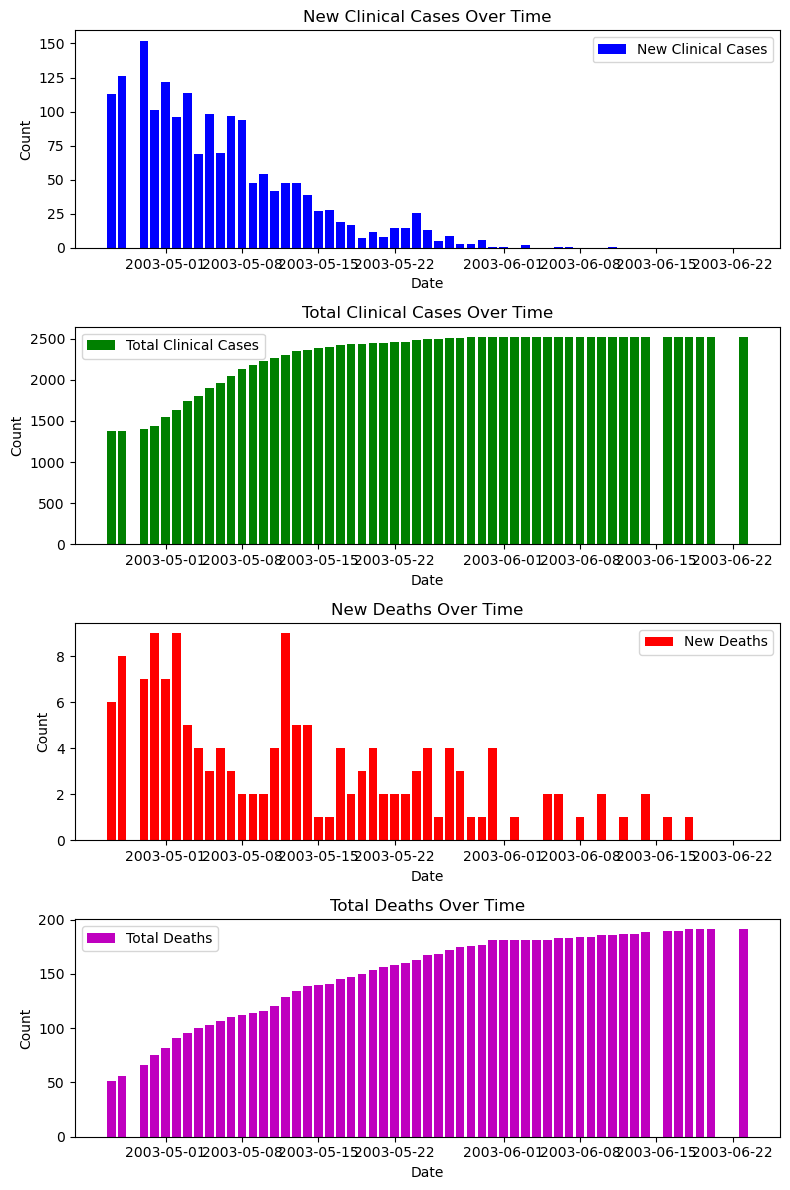

In [58]:
# Initialize the bar charts
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Plotting trends over time for New Clinical Cases, Total Clinical Cases, New Deaths, and Total Deaths using bar charts
axs[0].bar(df['Date'], df['New Clinical Cases'], color='b', label='New Clinical Cases')
axs[0].set_title('New Clinical Cases Over Time')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Count')
axs[0].legend()

axs[1].bar(df['Date'], df['Total Clinical Cases'], color='g', label='Total Clinical Cases')
axs[1].set_title('Total Clinical Cases Over Time')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Count')
axs[1].legend()

axs[2].bar(df['Date'], df['New Deaths'], color='r', label='New Deaths')
axs[2].set_title('New Deaths Over Time')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Count')
axs[2].legend()

axs[3].bar(df['Date'], df['Total Deaths'], color='m', label='Total Deaths')
axs[3].set_title('Total Deaths Over Time')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Count')
axs[3].legend()

# Show the bar charts
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


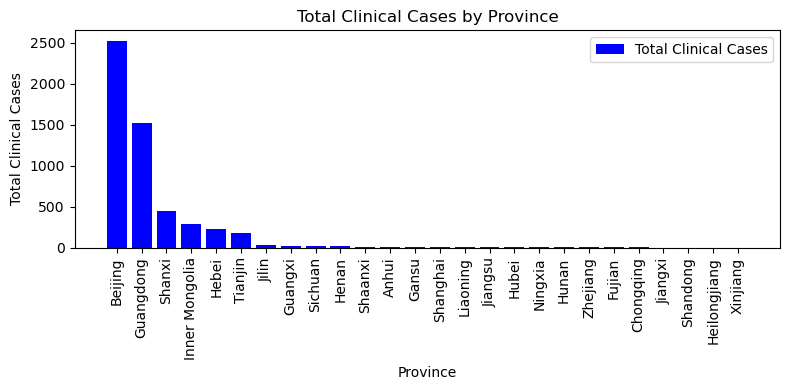

In [50]:

# Group the data by Province and sum up the total clinical cases and total deaths for each province

province_data = df.groupby('Province')[['Total Clinical Cases', 'Total Deaths']].max().reset_index()

# Sort the data by total clinical cases for better visualization
province_data.sort_values('Total Clinical Cases', ascending=False, inplace=True)

# Initialize the bar chart
plt.figure(figsize=(8, 4))

# Create a bar chart for Total Clinical Cases by Province
plt.bar(province_data['Province'], province_data['Total Clinical Cases'], color='b', label='Total Clinical Cases')
plt.title('Total Clinical Cases by Province')
plt.xlabel('Province')
plt.ylabel('Total Clinical Cases')
plt.xticks(rotation=90)
plt.legend()

# Show the bar chart
plt.tight_layout()
plt.show()

In [29]:
import folium


In [31]:

# Create a base map
m = folium.Map(location=[35.8617, 104.1954], zoom_start=4)

province_data = data.groupby('Province')['New Clinical Cases'].sum().reset_index()


# Mapping from province name to coordinates (latitude, longitude)
# Note: These coordinates are approximate central points and should be updated for precise mapping.
province_coordinates = {
    'Beijing': [39.9042, 116.4074],
    'Tianjin': [39.3434, 117.3616],
    'Hebei': [38.0428, 114.5149],
    'Shanxi': [37.5777, 112.2922],
    'Inner Mongolia': [44.0935, 113.9448],
    'Liaoning': [41.2956, 122.6087],
    'Jilin': [43.8378, 126.5496],
    'Heilongjiang': [47.8620, 127.7615],
    'Shanghai': [31.2304, 121.4737],
    'Jiangsu': [32.0617, 118.7625],
    'Zhejiang': [30.2674, 120.1528],
    'Anhui': [31.8612, 117.2859],
    'Fujian': [26.4837, 117.9249],
    'Jiangxi': [27.0875, 115.8582],
    'Shandong': [36.3427, 118.1498],
    'Henan': [34.2904, 113.3824],
    'Hubei': [30.7378, 112.2384],
    'Hunan': [27.6104, 111.5813],
    'Guangdong': [23.3790, 113.7633],
    'Guangxi': [23.7248, 108.8076],
    'Chongqing': [29.5630, 106.5516],
    'Sichuan': [30.2638, 102.8055],
    'Shaanxi': [35.1917, 108.8701],
    'Gansu': [37.8769, 101.4581],
    'Ningxia': [37.1989, 106.1581],
    'Xinjiang': [41.1129, 85.2401],
    'Total': [0, 0],  # Placeholder coordinates for 'Total'
    'Cumulative': [0, 0]  # Placeholder coordinates for 'Cumulative'
}

# Add data points to the map
for index, row in province_data.iterrows():
    province = row['Province']
    cases = row['New Clinical Cases']
    folium.CircleMarker(
        location=province_coordinates.get(province, [0, 0]),
        radius=10,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{province}: {cases} cases"
    ).add_to(m)

# Show the map
m.save('china_cases_map.html')

In [32]:
scale_factor = 0.001  # Adjust this value based on your specific data

# Add data points to the map
for index, row in province_data.iterrows():
    province = row['Province']
    cases = row['New Clinical Cases']
    scaled_radius = cases * scale_factor  # Scale the radius based on the number of cases
    folium.CircleMarker(
        location=province_coordinates.get(province, [0, 0]),
        radius=scaled_radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{province}: {cases} cases"
    ).add_to(m)

# Show the map
m.save('china_cases_map_scaled.html')